# Working with Insturmental Descriptions

the instrumental description is loaded by the event source, and consists of a hierarchy of classes in the ctapipe.instrument module, the base of which is the `SubarrayDescription`

First, let's open a file and load a single event so we get the instrument info in the event.inst container.

In [5]:
from ctapipe.utils.datasets import get_dataset
from ctapipe.io.hessio import hessio_event_source

filename = get_dataset("gamma_test_large.simtel.gz")
source = hessio_event_source(filename)
event = next(source)
del source # close the file

### now let's play with the SubarrayDescription:

In [9]:
subarray = event.inst.subarray

subarray.info()

Subarray: MonteCarloArray
Num Tels: 98

                TYPE  Num IDmin  IDmax
          LST:LSTCam    4    1 ..   4
        MST:FlashCam   25    5 ..  29
  SST-ASTRI:ASTRICam   69   30 ..  98


In [12]:
subarray.to_table()

tel_id,tel_pos_x,tel_pos_y,tel_description
,m,m,
int16,float64,float64,str18
1,-20.0,65.0,LST:LSTCam
2,-20.0,-65.0,LST:LSTCam
3,80.0,0.0,LST:LSTCam
4,-120.0,0.0,LST:LSTCam
5,0.0,0.0,MST:FlashCam
6,0.0,151.199996948,MST:FlashCam
7,0.0,-151.199996948,MST:FlashCam
8,146.655990601,75.5999984741,MST:FlashCam


In [15]:
tel = subarray.tel[5]
tel

TelescopeDescription(optics=MST, camera=FlashCam)

In [16]:
tel.optics

OpticsDescription(tel_type='MST', tel_subtype='')

In [23]:
tel.optics.mirror_area

In [17]:
tel.camera

CameraGeometry(cam_id='FlashCam', pix_type='hexagonal', npix=1764, cam_rot=0.0 deg, pix_rot=30.0 deg)

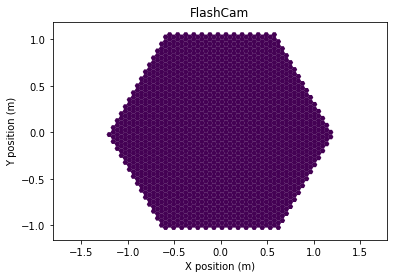

In [19]:
%matplotlib inline
from ctapipe.visualization import CameraDisplay
CameraDisplay(tel.camera)

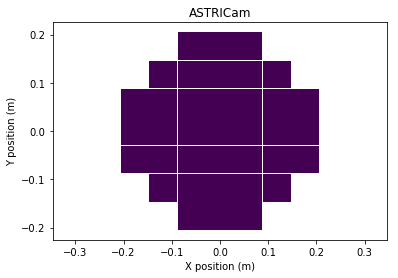

In [21]:
CameraDisplay(subarray.tel[98].camera)

In [35]:
tel.mirror_area = 14

In [29]:
tel.mirror_area

14